Import libraries.

In [2]:
import pymongo
import footmldb as fdb
import pandas as pd
from pandas.io.json import json_normalize
import json
import utils

In [ ]:
"""
Utility functions here...
"""

def get_db_matches():
    """
    Get a list of all matches from db
    """
    
    # Get matches from db, sorted by `match_datetime`
    db_ = connect_db(remote=True)
    ms = list(db_.matches.find())  # .sort("match_datetime")
    return ms


def get_matches_df():
    """
    Get a pandas dataframe of all matches in db
    """
    
    ms = get_db_matches()
    df_orig = json_normalize(ms)
    df = df_orig
    df['goals_home'] = df['result.fulltime.goals_home']
    df['goals_away'] = df['result.fulltime.goals_away']
    df = df.drop(['odds_link', '_id', 'result.extratime.goals_away', 'result.extratime.goals_home', 'result.halftime.goals_away', 'result.halftime.goals_home', 'result.fulltime.goals_away', 'result.fulltime.goals_home'], axis=1)
    df['num_odds'] = [len(a) for a in df['all_odds.winner']]
    return df


def get_bookie_stats():

    from collections import Counter
    ms = get_db_matches()

    bookies_count = {}
    bookies_list_global = []

    for m in ms:

        # Go through all odds and create a set of unique bookies appearing in each match
        bookies_set = set()
        all_odds = m['all_odds']['winner']
        if all_odds is None:
            continue
            
        all_odds = [item for item in all_odds if item is not None]
        all_odds = sorted(all_odds, key=lambda item:item['datetime'])
        for entry in all_odds:
            bookies_list = [e['bookie'] for e in entry['odds']]
            bookies_set.update(bookies_list)
            bookies_list_global.extend(bookies_list)

        # Update bookie appearance count for all matches
        for bookie in bookies_set:
            if bookie in bookies_count.keys():
                bookies_count[bookie] += 1
            else:
                bookies_count[bookie] = 1

    # Get bookies from most to least common appearances
    counter_all_appear = Counter(bookies_list_global)
    
    dict_all = {}
    dict_all['match_appear'] = bookies_count
    dict_all['all_appear'] = counter_all_appear
    
    df = pd.DataFrame(dict_all)
    df.sort_values(by='match_appear', inplace=True, ascending=False)
    return df

In [3]:
db_ = utils.connect_db(remote=True)

Connecting to remote db..


In [5]:
print(db_.matches.count())

1014


C:\Users\mp3213\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: count is deprecated. Use estimated_document_count or count_documents instead. Please note that $where must be replaced by $expr, $near must be replaced by $geoWithin with $center, and $nearSphere must be replaced by $geoWithin with $centerSphere
  """Entry point for launching an IPython kernel.


# Get matches (list / dataframe)

In [16]:
from imp import reload
reload(utils)
m = db_.matches.find_one({'team_home': 'Bournemouth', 'team_away': 'Arsenal'})
df = utils.create_odds_df(m_dict=m)
df.head(50)

,datetime,1,0,2,over2_5,under2_5,bookie
0,2018-11-17 18:14:48.407,3.40,3.75,2.00,1.53,2.50,Bet365
1,2018-11-17 18:14:48.407,3.30,3.80,2.00,1.50,2.50,Skybet
2,2018-11-17 18:14:48.407,3.40,3.70,2.00,1.53,2.50,Ladbrokes
3,2018-11-17 18:14:48.407,3.60,3.75,2.00,1.50,2.50,William Hill
4,2018-11-17 18:14:48.407,3.58,3.88,2.06,1.54,2.68,Marathon Bet
5,2018-11-17 18:14:48.407,3.60,3.80,2.00,1.45,2.55,Betfair Sportsbook
6,2018-11-17 18:14:48.407,3.50,3.90,2.05,1.53,2.50,Bet Victor
7,2018-11-17 18:14:48.407,3.50,3.75,1.91,1.45,2.55,Paddy Power
8,2018-11-17 18:14:48.407,3.55,3.80,1.95,1.54,2.55,Unibet
9,2018-11-17 18:14:48.407,3.40,3.70,2.00,1.53,2.50,Coral


Print a few matches:

Get one match and analyse it.

# Get bookies stats

Using the `get_bookie_stats` method, I can see bookies' activity and choose the most active ones to get data from.

In [ ]:
df = get_bookie_stats()
df

In [ ]:
# The following list belongs to the old db. Compare with the new one above

# df = get_bookie_stats()
# df
# 	all_appear	match_appear
# Bet 365	12831	902
# Sky Bet	11390	851
# Ladbrokes	10396	826
# William Hill	9985	802
# Marathon Bet	9537	780
# Betfair Sportsbook	9314	770
# SunBets	9176	764
# Paddy Power	9056	751
# Unibet	8967	748
# Coral	8848	743
# Betfred	8745	740
# Boylesports	8652	732
# Black Type	8521	723
# Betstars	8325	714
# Betway	8207	706
# BetBright	8062	695
# 10Bet	7819	685
# Sportingbet	7470	665
# 188Bet	7070	637
# 888sport	6518	605
# Bet Victor	5946	566
# Sportpesa	5261	519
# Betfair	4424	446
# Betdaq	3492	386
# Winner	1593	321
# Matchbook	2614	307
# Smarkets	1843	231
# Spreadex	1334	194

In [13]:
def plot_odds_winner(home_team, away_team):
    """
    Retrieves match directly from the db, creates a dataframe of odds and plots odds over time.
    
    todo: creating the dataframe should be done in a different function
    """
    
    import matplotlib.pyplot as plt
    
    # Retrieve match from database
    m = db_.matches.find_one({'team_home': home_team, 'team_away': away_team})
    if m is None:
        return "Match not found"
    
    # Create a dataframe of match odds
    df = pd.DataFrame()
    winner = m['all_odds']['winner']
    odds2 = []
    for odds in winner:
#         print(odds)
        for odd in odds['odds']:
            odd['datetime'] = odds['datetime']
            odds2.append(odd)
    df = pd.DataFrame(odds2, columns=['datetime', '1', '2', '0', 'bookie'])
    df['1'] = df['1'].astype('float32')
    df['2'] = df['2'].astype('float32')
    df['0'] = df['0'].astype('float32')
    df['bookie'] = df['bookie'].astype('str')

    # Filter over the following bookies
    bookies_to_plot = ['Bet 365', 
                       'Sky Bet', 
                       'Ladbrokes', 
                       "William Hill", 
                       "Marathon Bet", 
                       "Betfair Sportsbook", 
                       "SunBets", 
                       "Paddy Power",
                       "Unibet",
                       "Coral",
                       "Betfred",
                       "Bet Victor"]
    filters = [(df.bookie == "Bet 365") | (df.bookie == "Bet365"), 
          (df.bookie == "Sky Bet") | (df.bookie == "Skybet"), 
          (df.bookie == "Ladbrokes"),
          (df.bookie == "William Hill"),
          (df.bookie == "Marathon Bet"), 
          (df.bookie == "Betfair Sportsbook"),
          (df.bookie == "SunBets"),
          (df.bookie == "Paddy Power"), 
          (df.bookie == "Unibet"),
          (df.bookie == "Coral"),
          (df.bookie == "Betfred"),
          (df.bookie == "Bet Victor")]
    
    # Plot
    fig, ax = plt.subplots(3, 1, figsize=(15,10))
    fig.fig_size = (22,10)
    for filter_, bookie in zip(filters, bookies_to_plot):
        ax[0].plot(df[filter_].datetime, df[filter_]['1'], 'o-', label=bookie)
        ax[0].set_title("Home win")
        ax[1].plot(df[filter_].datetime, df[filter_]['0'], 'o-', label=bookie)
        ax[1].set_title("Draw")
        ax[2].plot(df[filter_].datetime, df[filter_]['2'], 'o-', label=bookie)
        ax[2].set_title("Away win")
    ax[0].legend(loc='lower left')
    ax[1].legend(loc='lower left')
    ax[2].legend(loc='lower left')
    fig.suptitle("%s | %s - %s | %s" % (str(m['match_datetime']), m['team_home'], m['team_away'], m['result']['score']), fontsize=16)
    plt.show()
    print("Last odds collected at: %s" % df[filter_].datetime.iloc[-1])
    
# plot_odds_winner("Sassuolo", "Lazio")

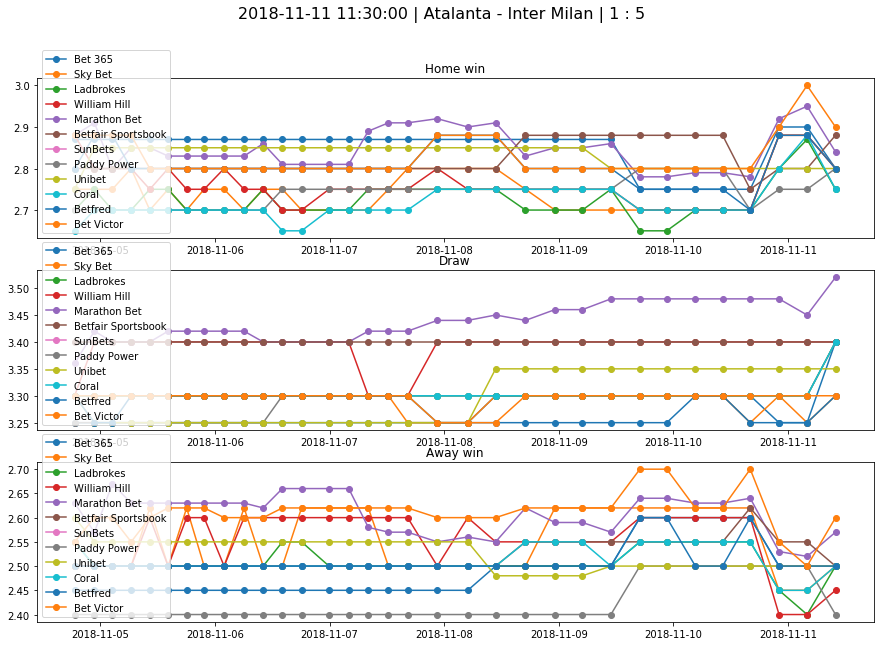

Last odds collected at: 2018-11-11 09:55:41.300000


In [14]:
plot_odds_winner("Atalanta", "Inter Milan")

In [16]:
def plot_odds_goals(home_team, away_team):
    """
    Retrieves match from db, creates a dataframe of odds and plots odds over time.
    
    todo: creating the dataframe should be done in a different function
    """
    
    import matplotlib.pyplot as plt
    
    # Retrieve match from database
    m = db_.matches.find_one({'team_home': home_team, 'team_away': away_team})
    if m is None:
        return "Match not found"
    
    # Create a dataframe of match odds
    df = pd.DataFrame()
    winner = m['all_odds']['total_goals']
    odds2 = []
    for odds in winner:
#         print(odds)
        for odd in odds['odds']:
            odd['datetime'] = odds['datetime']
            odds2.append(odd)
    df = pd.DataFrame(odds2, columns=['datetime', 'over2_5', 'under2_5','bookie'])
    df['over2_5'] = df['over2_5'].astype('float32')
    df['under2_5'] = df['under2_5'].astype('float32')
    df['bookie'] = df['bookie'].astype('str')

    # Filter over the following bookies
    bookies_to_plot = ['Bet 365', 
                       'Sky Bet', 
                       'Ladbrokes', 
                       "William Hill", 
                       "Marathon Bet", 
                       "Betfair Sportsbook", 
                       "SunBets", 
                       "Paddy Power",
                       "Unibet",
                       "Coral",
                       "Betfred",
                       "Bet Victor"]
    filters = [(df.bookie == "Bet 365") | (df.bookie == "Bet365"), 
          (df.bookie == "Sky Bet") | (df.bookie == "Skybet"), 
          (df.bookie == "Ladbrokes"),
          (df.bookie == "William Hill"),
          (df.bookie == "Marathon Bet"), 
          (df.bookie == "Betfair Sportsbook"),
          (df.bookie == "SunBets"),
          (df.bookie == "Paddy Power"), 
          (df.bookie == "Unibet"),
          (df.bookie == "Coral"),
          (df.bookie == "Betfred"),
          (df.bookie == "Bet Victor")]
    
    # Plot
    fig, ax = plt.subplots(2, 1, figsize=(15,10))
    fig.fig_size = (22,10)
    for filter_, bookie in zip(filters, bookies_to_plot):
        ax[0].plot(df[filter_].datetime, df[filter_]['over2_5'], 'o-', label=bookie)
        ax[0].set_title("Over 2.5")
        ax[1].plot(df[filter_].datetime, df[filter_]['under2_5'], 'o-', label=bookie)
        ax[1].set_title("Under 2.5")
    ax[0].legend(loc='lower left')
    ax[1].legend(loc='lower left')
    fig.suptitle("%s | %s - %s | %s" % (str(m['match_datetime']), m['team_home'], m['team_away'], m['result']['score']), fontsize=16)
    plt.show()
    print("Last odds collected at: %s" % df[filter_].datetime.iloc[-1])

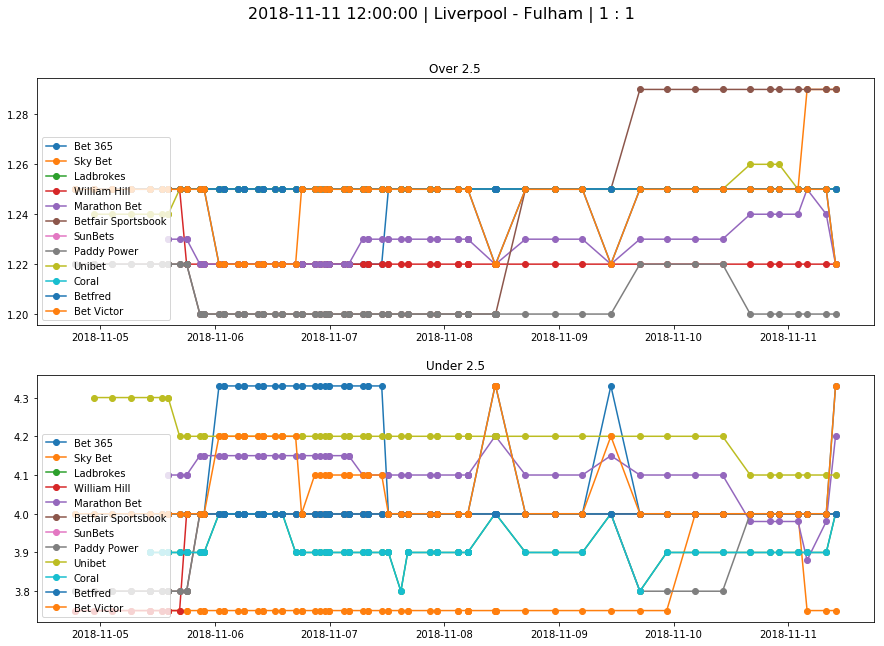

Last odds collected at: 2018-11-11 09:54:57.519000


In [21]:
plot_odds_goals("Liverpool", "Fulham")

## Bokeh

In [ ]:
df = get_bookie_stats()
df.head()